In [20]:
import os
import pandas as pd
import rasterio as rio
import rasterio.plot as plot
import matplotlib.pyplot as plt

In [9]:
data_dir = '/Users/corey/Documents/Research/CHART/data/godavari'
fig_dir = '/Users/corey/Documents/Research/CHART/figures'

In [11]:
hand_mask = rio.open(os.path.join(data_dir, 'hand_mask.tif'))
image_count = rio.open(os.path.join(data_dir, 'godavari_image_count_2018.tif'))
radar_stats = rio.open(os.path.join(data_dir, 'sentinel_godavari_2018_stats.tif'))

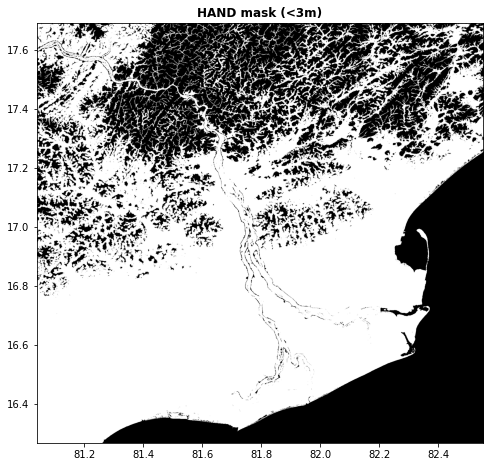

In [27]:
fig, ax = plt.subplots(figsize=(8,8))

plot.show(hand_mask, cmap='Greys_r', title='HAND mask (<3m)', ax=ax)
plt.savefig(os.path.join(fig_dir, 'hand_mask_fig.png'), dpi=300, facecolor='white')

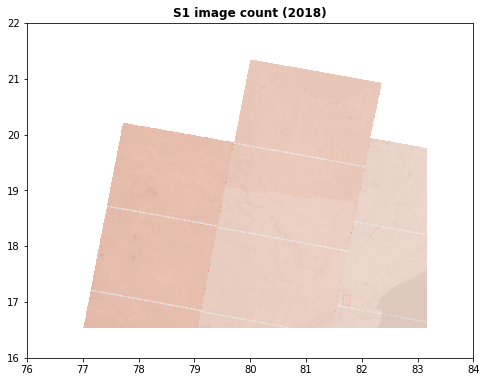

In [77]:
fig, ax = plt.subplots(figsize=(8,8))


plot.show(image_count.read(1), cmap='Greys_r', title='S1 image count (2018)', ax=ax, transform=image_count.transform)
plot.show(image_count.read(5), cmap='Reds_r', title='S1 image count (2018)', vmin=0, vmax=35, ax=ax, transform=image_count.transform, alpha=0.8)
ax.set_xlim(76, 84)
ax.set_ylim(16, 22)
plt.savefig(os.path.join(fig_dir, 'image_count_fig.png'), dpi=300, facecolor='white')

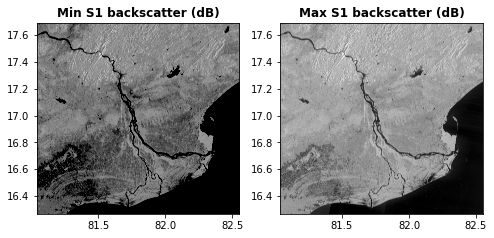

In [189]:
fig, ax = plt.subplots(1, 2, figsize=(8,8))

#hidden = plot.show(radar_stats.read(1), cmap='Greys_r', vmin= -35, vmax = 5, title='Max S1 backscatter (dB)')
im = plot.show(radar_stats.read(1), cmap='Greys_r', vmin= -35, vmax = 0, title='Min S1 backscatter (dB)', ax=ax[0], transform = radar_stats.transform)
im = plot.show(radar_stats.read(3), cmap='Greys_r', vmin= -35, vmax = 0, title='Max S1 backscatter (dB)', ax=ax[1], transform = radar_stats.transform)

#fig.colorbar(hidden, ax=ax)
plt.savefig(os.path.join(fig_dir, 'radar_max_backscatter_fig.png'), dpi=300, facecolor='white')

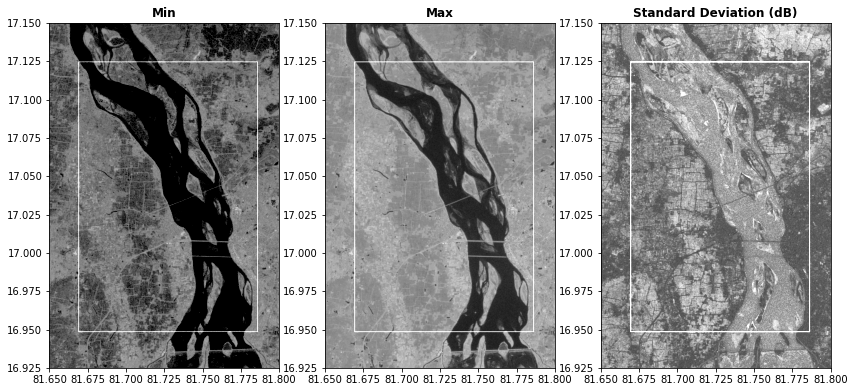

In [121]:
fig, ax = plt.subplots(1, 3, figsize=(14,8))

#hidden = plot.show(radar_stats.read(1), cmap='Greys_r', vmin= -35, vmax = 5, title='Max S1 backscatter (dB)')
plot.show(radar_stats.read(2), cmap='Greys_r', vmin= -35, vmax = 0, title='Max', ax=ax[0], transform = radar_stats.transform)
plot.show(radar_stats.read(3), cmap='Greys_r', vmin= -35, vmax = 0, title='Min', ax=ax[1], transform = radar_stats.transform)
plot.show(radar_stats.read(4), cmap='Greys_r', vmin= 0, vmax = 6, title='Standard Deviation (dB)', ax=ax[2], transform = radar_stats.transform)

for a in ax:
    a.set_xlim(81.65, 81.8)
    a.set_ylim(16.925, 17.15)

#fig.colorbar(hidden, ax=ax)
plt.savefig(os.path.join(fig_dir, 'radar_max_backscatter_zoomed.png'), dpi=300, facecolor='white')

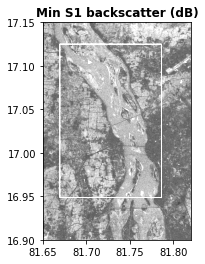

<AxesSubplot:title={'center':'Min S1 backscatter (dB)'}>

In [111]:
fig, a = plt.subplots()


a.set_xlim(81.65, 81.82)
a.set_ylim(16.9, 17.15)

plot.show(radar_stats.read(4), cmap='Greys_r', vmin= 0, vmax = 5, title='Min S1 backscatter (dB)', transform=radar_stats.transform)

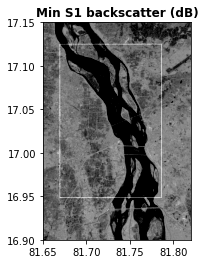

<AxesSubplot:title={'center':'Min S1 backscatter (dB)'}>

In [109]:
fig, a = plt.subplots()


a.set_xlim(81.65, 81.82)
a.set_ylim(16.9, 17.15)

plot.show(radar_stats.read(1), cmap='Greys_r', vmin= -35, vmax = 0, title='Min S1 backscatter (dB)', transform=radar_stats.transform)

<Figure size 432x720 with 0 Axes>

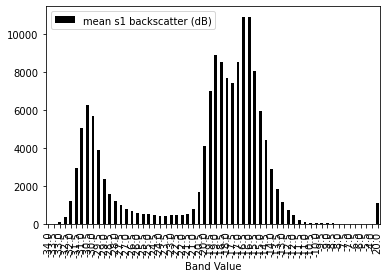

In [155]:
fig = plt.figure(figsize=(6, 10))

hist = pd.read_csv(os.path.join(data_dir, 'max_backscatter_s1_godavari.csv')).dropna()


hist.plot.bar('Band Value','mean Count', color='black')
plt.legend(['mean s1 backscatter (dB)'])
plt.savefig(os.path.join(fig_dir, 'hist_mean_values.png'), dpi=300, facecolor='white')

<Figure size 432x720 with 0 Axes>

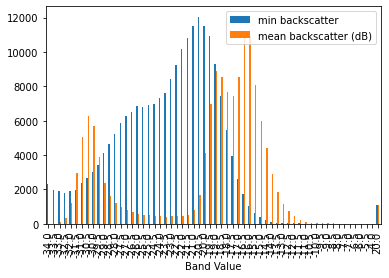

In [191]:
fig = plt.figure(figsize=(6, 10))

hist = pd.read_csv(os.path.join(data_dir, 'max_backscatter_s1_godavari.csv')).dropna()


hist.plot.bar('Band Value',['min Count', 'mean Count'])
plt.legend(['min backscatter', 'mean backscatter (dB)'])
plt.savefig(os.path.join(fig_dir, 'hist_problems.png'), dpi=300, facecolor='white')

In [194]:
pd.read_csv(os.path.join(data_dir, 'max_backscatter_s1_godavari.csv')).values

array([[-5.00000e+01,          nan,  1.00000e+00],
       [-4.95000e+01,          nan,  1.00000e+00],
       [-4.90000e+01,          nan,  4.00000e+00],
       [-4.85000e+01,          nan,  8.00000e+00],
       [-4.80000e+01,          nan,  1.90000e+01],
       [-4.75000e+01,          nan,  7.12000e+02],
       [-4.70000e+01,          nan,  5.31000e+02],
       [-4.65000e+01,          nan,  5.25000e+02],
       [-4.60000e+01,          nan,  6.20000e+02],
       [-4.55000e+01,          nan,  6.49000e+02],
       [-4.50000e+01,          nan,  8.59000e+02],
       [-4.45000e+01,          nan,  8.95000e+02],
       [-4.40000e+01,          nan,  1.06700e+03],
       [-4.35000e+01,          nan,  1.28400e+03],
       [-4.30000e+01,          nan,  1.43200e+03],
       [-4.25000e+01,          nan,  1.68600e+03],
       [-4.20000e+01,          nan,  1.90900e+03],
       [-4.15000e+01,          nan,  2.27300e+03],
       [-4.10000e+01,          nan,  2.58100e+03],
       [-4.05000e+01,          

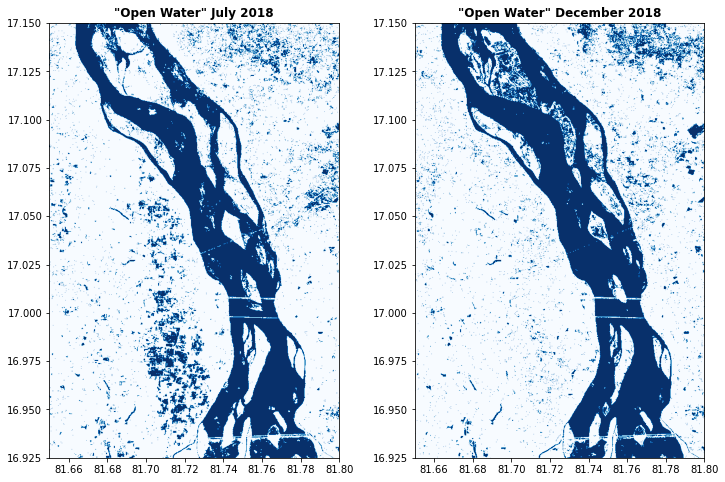

In [162]:
fig, ax = plt.subplots(1, 2, figsize=(12,8))

month_6 = rio.open(os.path.join(data_dir, 'month_6_godav_2018.tif'))
month_12 = rio.open(os.path.join(data_dir, 'month_12_godav_2018.tif'))

#hidden = plot.show(radar_stats.read(1), cmap='Greys_r', vmin= -35, vmax = 5, title='Max S1 backscatter (dB)')
plot.show(month_6.read(1), cmap='Blues', vmin= 0, vmax = 1, title='"Open Water" July 2018', ax=ax[0], transform = month_6.transform)
plot.show(month_12.read(1), cmap='Blues', vmin= 0, vmax = 1, title='"Open Water" December 2018', ax=ax[1], transform = month_12.transform)

for a in ax:
    a.set_xlim(81.65, 81.8)
    a.set_ylim(16.925, 17.15)


#fig.colorbar(hidden, ax=ax)
plt.savefig(os.path.join(fig_dir, 'water_classification18_fig.png'), dpi=300, facecolor='white')

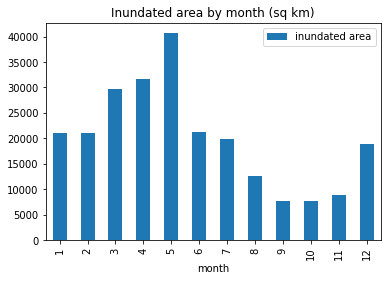

In [188]:
area_count = [
  21046627333.376637,
  21100749903.31028,
  29783705678.995876,
  31725751223.862896,
  40713025765.66268,
  21323032225.18665,
  19905056872.565647,
  12505163791.497149,
  7600592856.065826,
  7588413923.8171215,
  8953968987.024984,
  18954515627.115833
]

inundated_area = pd.DataFrame(area_count) / 1e6
inundated_area['month'] = (pd.Series([1,2,3,4,5,6,7,8,9,10,11,12]))

inundated_area.set_index('month', inplace=True)

inundated_area.plot(kind='bar', title='Inundated area by month (sq km)')
plt.legend(['inundated area'])
plt.savefig(os.path.join(fig_dir, 'inundated_area_example.png'), dpi=300, facecolor='white')

In [178]:
inundated_area

,0,month
0,2.104663e+10,1
1,2.110075e+10,2
2,2.978371e+10,3
3,3.172575e+10,4
4,4.071303e+10,5
5,2.132303e+10,6
6,1.990506e+10,7
7,1.250516e+10,8
8,7.600593e+09,9
9,7.588414e+09,10
